<a href="https://colab.research.google.com/github/BonesetterB/Data_HMW_2/blob/main/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount("/drive",force_remount=True)

Mounted at /drive


In [7]:
table=pd.read_csv("/drive/My Drive/2017_jun_final.csv")
print(table.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [8]:
print(table.shape)

(8704, 25)


In [9]:
print(table.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [10]:
missing_percentage = (table.isnull().sum() / len(table)) * 100

print(missing_percentage)

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [11]:
table_new=table.drop(["Специализация","Университет","Предметная.область","Валюта","cls"],axis=1)
print(table_new)

         N                 Должность Язык.программирования Общий.опыт.работы  \
0        1        Junior QA engineer                   NaN               0.5   
1        2        Junior QA engineer                   NaN  меньше 3 месяцев   
2        3         Software Engineer               C#/.NET                 4   
3        4         Software Engineer            JavaScript                 5   
4        5  Senior Software Engineer            JavaScript    10 и более лет   
...    ...                       ...                   ...               ...   
8699  8700               QA engineer                   NaN                 1   
8700  8701                 Marketing                   NaN               0.5   
8701  8702  Junior Software Engineer            Ruby/Rails                 1   
8702  8703                 Team lead                   NaN                 6   
8703  8704  Senior Software Engineer                  Java                 7   

     Опыт.работы.на.текущем.месте  Зарп

In [12]:
missing_percentage = (table_new.isnull().sum() / len(table_new)) * 100

print(missing_percentage)

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [13]:
table_new=table_new.dropna()
print(table_new.shape)

(4854, 20)


In [14]:
python_data=table_new[table_new['Язык.программирования']=='Python']
print(python_data.shape)

(207, 20)


In [15]:
group=python_data.groupby("Должность")

In [16]:
New_table=pd.read_csv("/drive/My Drive/2017_jun_final.csv")
change_new=New_table.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max'])
print(change_new)

                                             min    max
Должность                                              
Business analyst                             200   5000
DBA                                          380   6000
Data Scientist / Data Analyst                150   8000
Designer                                     100   4000
DevOps                                       194  10000
Director of Engineering / Program Director  1500  34000
ERP / CRM                                    100   6000
Game designer                                150   6800
HR                                           100   7000
HTML coder                                   154   3000
Junior QA engineer                            96   2000
Junior Software Engineer                      75   2600
Marketing                                    100   4000
Product Manager                              250   5000
Project manager                              190   8000
QA Tech Lead                                 430

In [17]:
def fill_avg_salary(row):
    avg_salary = row.mean()
    return avg_salary

change_new['avg'] = change_new.apply(fill_avg_salary, axis=1)
print(change_new)

                                             min    max      avg
Должность                                                       
Business analyst                             200   5000   2600.0
DBA                                          380   6000   3190.0
Data Scientist / Data Analyst                150   8000   4075.0
Designer                                     100   4000   2050.0
DevOps                                       194  10000   5097.0
Director of Engineering / Program Director  1500  34000  17750.0
ERP / CRM                                    100   6000   3050.0
Game designer                                150   6800   3475.0
HR                                           100   7000   3550.0
HTML coder                                   154   3000   1577.0
Junior QA engineer                            96   2000   1048.0
Junior Software Engineer                      75   2600   1337.5
Marketing                                    100   4000   2050.0
Product Manager          

In [18]:
description = change_new['avg'].describe()

print(description)

count       32.000000
mean      3449.234375
std       3093.885174
min        900.000000
25%       1820.500000
50%       2837.500000
75%       3756.250000
max      17750.000000
Name: avg, dtype: float64


In [19]:
change_new.to_csv('table_salary.csv', index=False)

In [20]:
%matplotlib inline

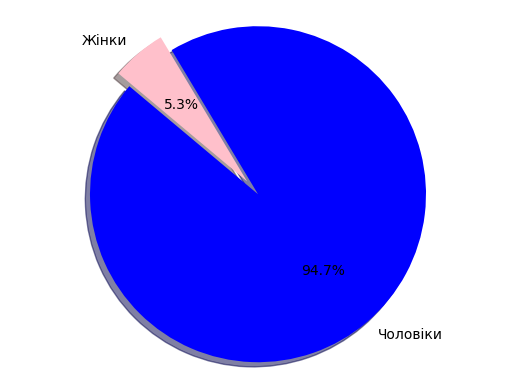

In [24]:
labels=["Чоловіки", "Жінки"]
gender_counts = table_new['Пол'].value_counts()
sizes = gender_counts.values
colors = ['blue', 'pink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.show()

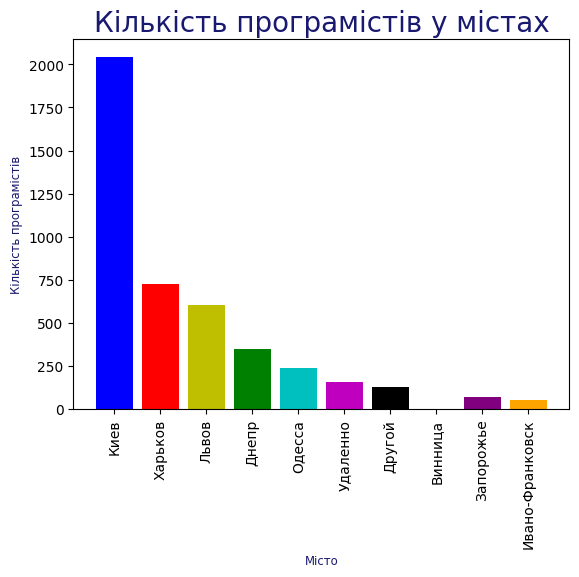

In [32]:
city_counts = table_new['Город'].value_counts()

plt.bar(city_counts.head(10).index, city_counts.head(10).values, color = ["b", "r", "y", "g", "c", "m", "k", "w", "purple", "orange"])
plt.xlabel("Місто", fontsize="small", color="midnightblue")
plt.ylabel("Кількість програмістів", fontsize="small", color="midnightblue")
plt.title("Кількість програмістів у містах", fontsize=20, color="midnightblue")

plt.xticks(rotation=90)

plt.show()

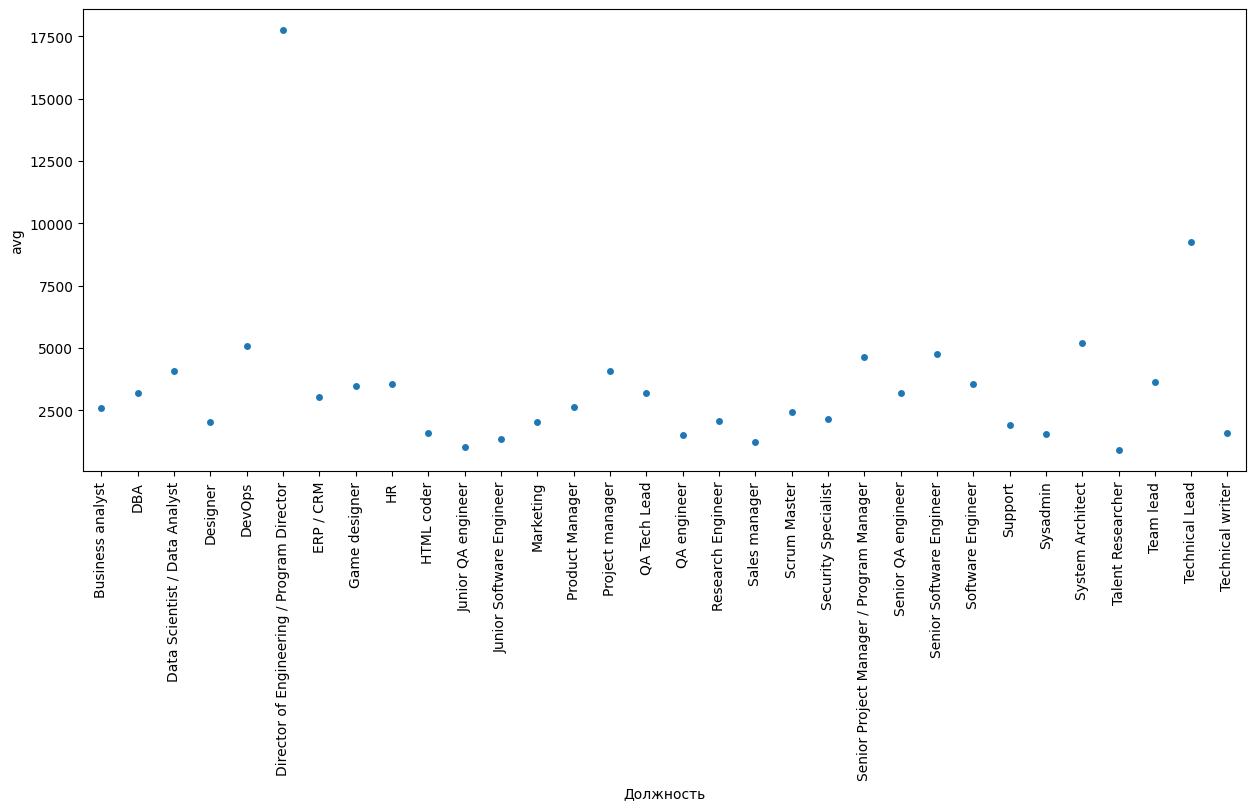

In [40]:
plot=sns.swarmplot(x='Должность', y='avg', data=change_new)

plot.figure.set_size_inches(15, 6)
plt.xticks( rotation=90)
plt.show()